<a href="https://colab.research.google.com/github/lisaong/mldds-courseware/blob/master/03_TextImage/examples/Clustering_NLB_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering National Library Board Infopedia Articles

In this example, we will use clustering to explore the summaries of different articles published by the National Library Board about Singapore.

The hypothesis is that the words used in the text can separate the articles into different "topic" groups.

The use case is automatic topic suggestion for new articles.

Data Source: https://data.gov.sg/dataset/national-library-board-infopedia-articles

In [1]:
!pip3 install nltk

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
    100% |████████████████████████████████| 1.5MB 192kB/s ta 0:00:01   7% |██▌                             | 112kB 193kB/s eta 0:00:07


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# use stop words from nltk instead of sklearn as they are more reliable
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# clustering
from sklearn.cluster import MiniBatchKMeans

# visualisation (for sparse matrices)
from sklearn.decomposition import TruncatedSVD

# topic extraction
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('http://opendata.nlb.gov.sg/content/opds/datagovsg/sg-infopedia.csv')
df

,uid,book_title,subject,summary,original_publisher,digital_publisher,format,language,copyright,author_name,published,resource_url,cover,thumbnail
0,d129a114-12d1-456f-ba77-3c1fad52d9ab,17th APEC meeting,Events | Economy |nlbshtx:Events|nlbshtx:Econo...,Singapore hosted the 17th Asia-Pacific Economi...,na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
1,2dbdfae5-8e45-48da-87e0-5e8436a7ff44,17th century Singapore Straits,Politics and Government {18336134}|Geography a...,The Singapore Straits is among the most geogra...,na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
2,92bb56f0-e821-40d1-bd8c-cf8fa7e7f172,1819 Singapore Treaty,Politics and Government {18336134}|Events {184...,"On 6 February 1819, Sir Stamford Raffles, Teme...",na,National Library Board Singapore,text/html :. .,eng,na,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
3,9590a69f-b3c8-4208-92bb-11ff74934af6,1824 Treaty of Friendship and Alliance,na,The Treaty of Friendship and Alliance was sign...,na,National Library Board Singapore,text/html :. .,eng,All Rights Reserved. National Library Board Si...,na,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
4,82db2bb0-b99c-4a9f-9beb-b25626cb3f87,1915 Singapore Mutiny,nlbshtx:Events>>Historical Periods>>Founding o...,"In the midst of World War I, on 15 February 19...",na,National Library Board Singapore,"text/html :. 11 KB, 2 p..",eng,na,"Tan, Bonny",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
5,acb17f61-a78f-40b0-8c16-4075459d7f57,1949 Municipal Commission Election,Politics and Government {18336134}|Elections {...,"On 2 April 1949, the Municipal Commission elec...",na,National Library Board Singapore,text/html :. .,eng,All Rights Reserved. National Library Board Si...,Nadirah Norruddin,na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
6,34e88c56-655f-4fa7-880c-aeed7645f9f0,1955 Legislative Assembly general election,Politics and Government {18336134}|Events {184...,"On 2 April 1955, a general election was held t...",na,National Library Board Singapore,text/html :. .,eng,na,"Lim, Tin Seng",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
7,d779b791-2ddf-45ab-8fb9-0676cb7cd6d6,1955 Singapore Harbour Board Staff Association...,nlbshtx:Organisations>>Trade Unions|Strikes an...,"On 30 April 1955, about 1,300 port workers emp...",na,National Library Board Singapore,"text/html :. 26 KB, 3 p..",eng,na,Tettyana Jasli,2012-05-02,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
8,cac95fb9-f39f-4de1-a142-41e971017fe3,1959 Legislative Assembly General Election,Political development {18486587}|Political eve...,"On 30 May 1959, a General Election was held to...",na,National Library Board Singapore,text/html :. .,eng,na,"Lim, Tin Seng",na,http://eresources.nlb.gov.sg/infopedia/article...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...,http://eservice.nlb.gov.sg/bookcoverwrapper/co...
9,c255f9fb-7b8e-4e09-a011-f43f98958d90,2018 Trump-Kim Summit,Political events {18544984}|nlbshtx:Politics a...,"On 12 June 2018, Singapore hosted a historic m...",na,National Library Board Singapore,text/html :. .,eng,

In [3]:
# select a column with interesting text
df['summary']

0       Singapore hosted the 17th Asia-Pacific Economi...
1       The Singapore Straits is among the most geogra...
2       On 6 February 1819, Sir Stamford Raffles, Teme...
3       The Treaty of Friendship and Alliance was sign...
4       In the midst of World War I, on 15 February 19...
5       On 2 April 1949, the Municipal Commission elec...
6       On 2 April 1955, a general election was held t...
7       On 30 April 1955, about 1,300 port workers emp...
8       On 30 May 1959, a General Election was held to...
9       On 12 June 2018, Singapore hosted a historic m...
10      4-D is the most popular gambling pastime in Si...
11      Masjid Abdul Gaffoor, or Abdul Gaffoor Mosque,...
12      Abdul Ghani Abdul Hamid (b. 13 April 1933, Sin...
13      Abdul Rahim Ishak (b. 25 July 1925, Singapore–...
14      Abraham Logan (b. 31 August 1816, Hattan Hall,...
15      Abraham Solomon (b. 1798?, Baghdad - d. 19 May...
16      The Active, Beautiful, Clean Waters (ABC Water...
17      Some o

## Vectorisation

Convert the text column into a document-term matrix using TFIDF.

- We will remove stopwords because the articles are quite long.
- Try unigrams and bigrams to get some word combinations.

In [4]:
# convert the text to vectors
# removing stopwords, use unigrams and bigrams

stop_words = stopwords.words('english')
stop_words.extend(['singapore']) # add more common words

vec = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 2))
vec_summary = vec.fit_transform(df['summary'])
vec_summary

<1935x79425 sparse matrix of type '<class 'numpy.float64'>'
	with 156433 stored elements in Compressed Sparse Row format>

## Clustering

Cluster with kmeans. We'll try a few ks to get an elbow plot to find a suitable k.

Note: this can take a while to run because our matrices are large.

In [30]:
kmeans = dict()
kmeans

{}

In [37]:
%%timeit
for k in range(6, 12):
    # kmeans uses randomized centroid initialization,
    # so we set a random state to get stable cluster assignments
    if k not in kmeans:
        kmeans[k] = []
    
    km = MiniBatchKMeans(n_clusters=k, random_state=42)
    km.fit(vec_summary)
    kmeans[k].append(km)

20.9 s ± 1.56 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
kmeans

{6: [MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
          init_size=None, max_iter=100, max_no_improvement=10, n_clusters=6,
          n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
          verbose=0),
  MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
          init_size=None, max_iter=100, max_no_improvement=10, n_clusters=6,
          n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
          verbose=0),
  MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
          init_size=None, max_iter=100, max_no_improvement=10, n_clusters=6,
          n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
          verbose=0),
  MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
          init_size=None, max_iter=100, max_no_improvement=10, n_clusters=6,
          n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
          verbose=0),
  MiniBatchKMeans(batch_s

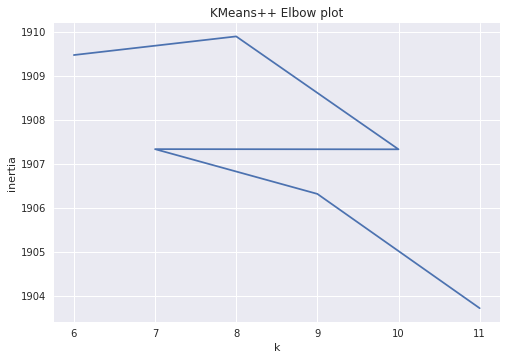

In [40]:
# Plot the ks vs. inertias to try to find any "elbow"

# find the average inertias
mean_inertia = {}
for k, v in kmeans.items():
    inertia = np.array([km.inertia_ for km in v]).mean()
    mean_inertia[k] = inertia

fig, ax = plt.subplots()
ax.plot(mean_inertia.keys(), mean_inertia.values())
ax.set_xlabel('k')
ax.set_ylabel('inertia')
ax.set_title('KMeans++ Elbow plot')
plt.show()

In [41]:
# let's try k = 10
k = 10
kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
kmeans.fit(vec_summary)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [42]:
clusters = kmeans.predict(vec_summary)
clusters

array([3, 3, 3, ..., 3, 3, 3])

## Visualization

After performing clustering, we will take the cluster assignments and plot them using SVD. 

Since the document-term matrix is large and sparse, we use an algorithm that can handle sparse matrices.

In [43]:
svd = TruncatedSVD(n_components=2)
vec_2d = svd.fit_transform(vec_summary)
vec_2d

array([[ 0.04795019, -0.04640422],
       [ 0.06118702, -0.01817068],
       [ 0.06401793, -0.03491397],
       ...,
       [ 0.05275493, -0.05759089],
       [ 0.04447171, -0.05078012],
       [ 0.08173036, -0.08798996]])

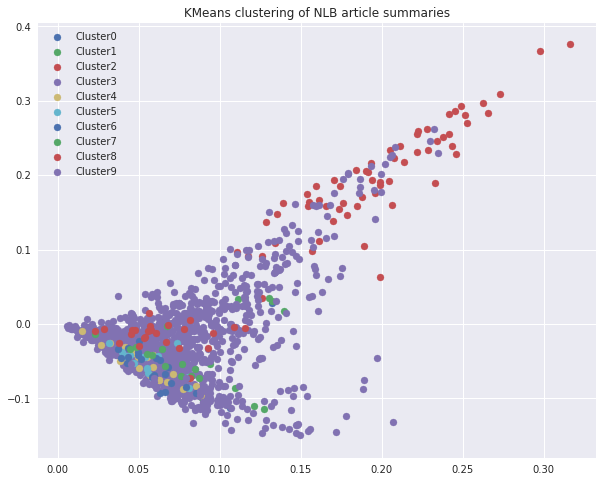

In [44]:
# plot different colours based on clusters

fig, ax = plt.subplots(figsize=(10, 8))
for i in range(k):
    ax.scatter(vec_2d[clusters==i, 0], vec_2d[clusters==i, 1], label=f'Cluster{i}')
    
ax.set_title('KMeans clustering of NLB article summaries')
ax.legend()
plt.show()

## Visual Inspection

We'll use masking to show the summary text of some clusters. 

In [45]:
df['summary'][clusters==1]

188     Capitol Building straddles the corner of Stamf...
189     The Capitol Theatre, located at the junction o...
201     Officially registered as a society in 1999, th...
520     Fort Canning Cemetery was one of the first bur...
663     Ho Rih Hwa (b. 1917, Singapore–d. 28 August 19...
856     Lee Khoon Choy (b. 1924, Penang–27 February 20...
1126    The 22.3-hectare Newton Circus is one of the s...
1153    The old racecourse (at what is today Farrer Pa...
1363    A soft and yet crisp flatbread, roti prata (or...
1500    The Singapore Indoor Stadium was officially op...
1598    Stamford House, located at the junction of Sta...
Name: summary, dtype: object

In [46]:
df['summary'][clusters==2]

27      Albert Street, located in the Rochor area, beg...
46      Amoy Street in Chinatown begins at the junctio...
62      Anson Road is located in the Tanjong Pagar are...
69      Arab Street lies between Victoria Street and B...
73      Armenian Street begins at the junction of Cole...
98      Banda Street is a one-way road in Chinatown co...
103     Battery Road is located in the central busines...
146     Boon Tat Street is a one-way street located in...
154     Bras Basah Road is a one-way road that starts ...
263     China Street connects Cross Street to the junc...
266     Chin Chew Street, in Chinatown, connects South...
304     Chulia Street is located in the central region...
324     Clogs were the preferred form of footwear in S...
347     Craig Road begins from the junction of Neil Ro...
353     Cross Street is a one-way street that begins f...
402     Believed to be named after Colonel Samuel Dunl...
404     Duxton Road is a one-way street that connects ...
438     Enggor

In [47]:
df['summary'][clusters==6]

10      4-D is the most popular gambling pastime in Si...
34      Alfian bin Sa’at (b. 18 July 1977, Singapore–)...
197     Cathay Organisation is a leisure and entertain...
378     Desmond Sim Kim Jin (b. 1961, Singapore–) is a...
385     Lee Peng Boon (b. 1956, Singapore–), popularly...
406     Edmund William Barker (b. 1 December 1920, Sin...
709     Jah Lelawati (b.1937, Medan, Indonesia–d. 2 No...
729     Jennifer Tham Sow Ying (b. 1962, Singapore–) i...
1082    The National Council on Problem Gambling (NCPG...
1188    Ovidia Yu (b. 1961, Singapore–) is an award-wi...
1248    The Port of Singapore Authority (PSA) was form...
1367    Rufino Soliano (b. 10 January 1932, Singapore–...
1434    The outbreak of severe acute respiratory syndr...
1439    Shaw Organisation is best known as a major pla...
1485    The Singapore Foochow Association was register...
1513    Singapore and Malaysia have signed four water ...
1520    The Singapore Progressive Party (SPP) was a na...
1529    The Si

## Topic Extraction

Instead of doing manual visual inspection, a more automated approach is to do "topic extraction" on the clusters.

Topic extraction has benefits in that it also suggests "topic words" so that we don't have to inspect the clusters. Whereas clustering is a general technique that we can use for many things (not just topic extraction).

For each cluster:
 - Use Latent Dirichlet Allocation to extract the top topics
 - Map the top topics to keywords in the documents

References:
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
- https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

In [74]:
# For each cluster, we will run LDA to extract top topics
#
# Effectively, LDA performs the following transformation:
#   document_topic = document_word.dot(topic_word.T)
#
#   The output matrix, document_topic, indicates the topic probabilities
#   for each document. This can be used to extract topics (top topics per doc)
#
#   The components matrix, topic_word, indicates the word probabilities
#   for each topic. This can be used to extract keywords (top words per topic)

def extract_topics(tfidf_transformer, summary_tfidf, num_topics=5):
  topic_names = np.array([f'Topic {i}' for i in range(num_topics)])

  lda = LatentDirichletAllocation(n_components=num_topics)
  topic_probabilities = lda.fit_transform(summary_tfidf)
  
  # get top topic for each document
  # LDA transformation returns document_topic probabilities matrix
  df_document_topic = pd.DataFrame(topic_probabilities)
  top_topics = df_document_topic.values.argmax(axis=1)
  _, counts = np.unique(top_topics, return_counts=True)

  # in case top topics returned < num_topics
  num_topics_found = min(num_topics, len(counts))
  topic_counts = pd.Series(counts, index=topic_names[:num_topics_found])

  # get topic keywords
  # LDA components contain the topic_word probabilities matrix
  keywords = lda.components_
  df_topic_words = pd.DataFrame(keywords, 
                                index=topic_names,
                                columns=tfidf_transformer.get_feature_names())

  return topic_counts, df_topic_words

In [75]:
# Try on cluster 6
cluster_id = 6
topics, keywords = extract_topics(vec, vec_summary[clusters==cluster_id])
topics, keywords

(Topic 0    5
 Topic 1    5
 Topic 2    4
 Topic 3    5
 Topic 4    3
 dtype: int32,
           00  00 pm  000  000 acre  000 allied  000 animals  000 annual  \
 Topic 0  0.2    0.2  0.2       0.2         0.2          0.2         0.2   
 Topic 1  0.2    0.2  0.2       0.2         0.2          0.2         0.2   
 Topic 2  0.2    0.2  0.2       0.2         0.2          0.2         0.2   
 Topic 3  0.2    0.2  0.2       0.2         0.2          0.2         0.2   
 Topic 4  0.2    0.2  0.2       0.2         0.2          0.2         0.2   
 
          000 birds  000 books  000 borneo     ...       陶融儒乐社 musical   鱼生  \
 Topic 0        0.2        0.2         0.2     ...                 0.2  0.2   
 Topic 1        0.2        0.2         0.2     ...                 0.2  0.2   
 Topic 2        0.2        0.2         0.2     ...                 0.2  0.2   
 Topic 3        0.2        0.2         0.2     ...                 0.2  0.2   
 Topic 4        0.2        0.2         0.2     ...            

In [76]:
print(f'Top topic for cluster {cluster_id}: {topics.idxmax()}')
# Note that the topic index will change each time we run LDA, because LDA
# is unsupervised. However, the number of topics is fixed.

Top topic for cluster 6: Topic 0


In [77]:
num_keywords = 5
print('Top {num_keywords} topic keywords for cluster {cluster_id}')
keywords.loc[topics.idxmax()].sort_values(ascending=False)[:num_keywords]

Top {num_keywords} topic keywords for cluster {cluster_id}


choir               0.685222
sports              0.653856
problem gambling    0.566404
council             0.546325
problem             0.518287
Name: Topic 0, dtype: float64

In [78]:
# let's create a function to get the topic keywords and probabilities

def show_topics(tfidf_transformer, summary_tfidf, cluster_id, num_keywords=5):
  topics, keywords = extract_topics(tfidf_transformer, 
                                    summary_tfidf[clusters==cluster_id])
  top_topic = topics.idxmax()
  print(f'Cluster {cluster_id} topic keywords and probabilities:')
  print(keywords.loc[top_topic].sort_values(ascending=False)[:num_keywords])
  print()

In [79]:
for cluster_id in range(k):
  show_topics(vec, vec_summary, cluster_id)

Cluster 0 topic keywords and probabilities:
monument             0.200011
way                  0.200011
considered           0.200011
national monument    0.200011
however              0.200011
Name: Topic 0, dtype: float64

Cluster 1 topic keywords and probabilities:
racecourse        0.562092
lee               0.516140
stadium           0.452495
indoor stadium    0.423569
indoor            0.412056
Name: Topic 2, dtype: float64

Cluster 2 topic keywords and probabilities:
street         7.251708
road           6.159687
bridge         2.931778
bridge road    2.867179
one way        2.537260
Name: Topic 3, dtype: float64

Cluster 3 topic keywords and probabilities:
road       5.104909
chinese    4.028016
first      3.770744
also       3.624348
school     3.596388
Name: Topic 0, dtype: float64

Cluster 4 topic keywords and probabilities:
hair           0.511460
foo            0.473509
university     0.459322
photography    0.442422
range          0.438060
Name: Topic 3, dtype: float64

